In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Styling for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [30]:
# Load the data
iris = sns.load_dataset('iris')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [8]:
print("=== DATASET SHAPE ===")
print(f"Shape: {iris.shape}")
print(f"Number of rows: {iris.shape[0]}")
print(f"Number of columns: {iris.shape[1]}")

print("\n=== COLUMNS ===")
print(iris.columns.tolist())

print("\n=== DATASET INFO ===")
iris.info()

print("\n=== FIRST 10 ROWS ===")
print(iris.head(10))

print("\n=== BASIC STATISTICS ===")
print(iris.describe())

print("\n=== SPECIES DISTRIBUTION ===")
print(iris['species'].value_counts())

=== DATASET SHAPE ===
Shape: (150, 5)
Number of rows: 150
Number of columns: 5

=== COLUMNS ===
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== FIRST 10 ROWS ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4       

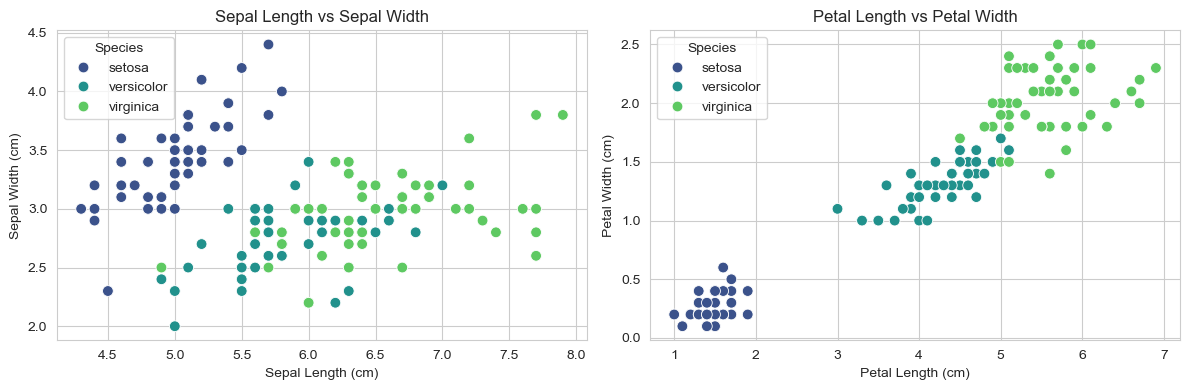

In [10]:
# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='viridis', s=60)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')

# Scatter plot: Petal Length vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='viridis', s=60)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')

plt.tight_layout()
plt.show()

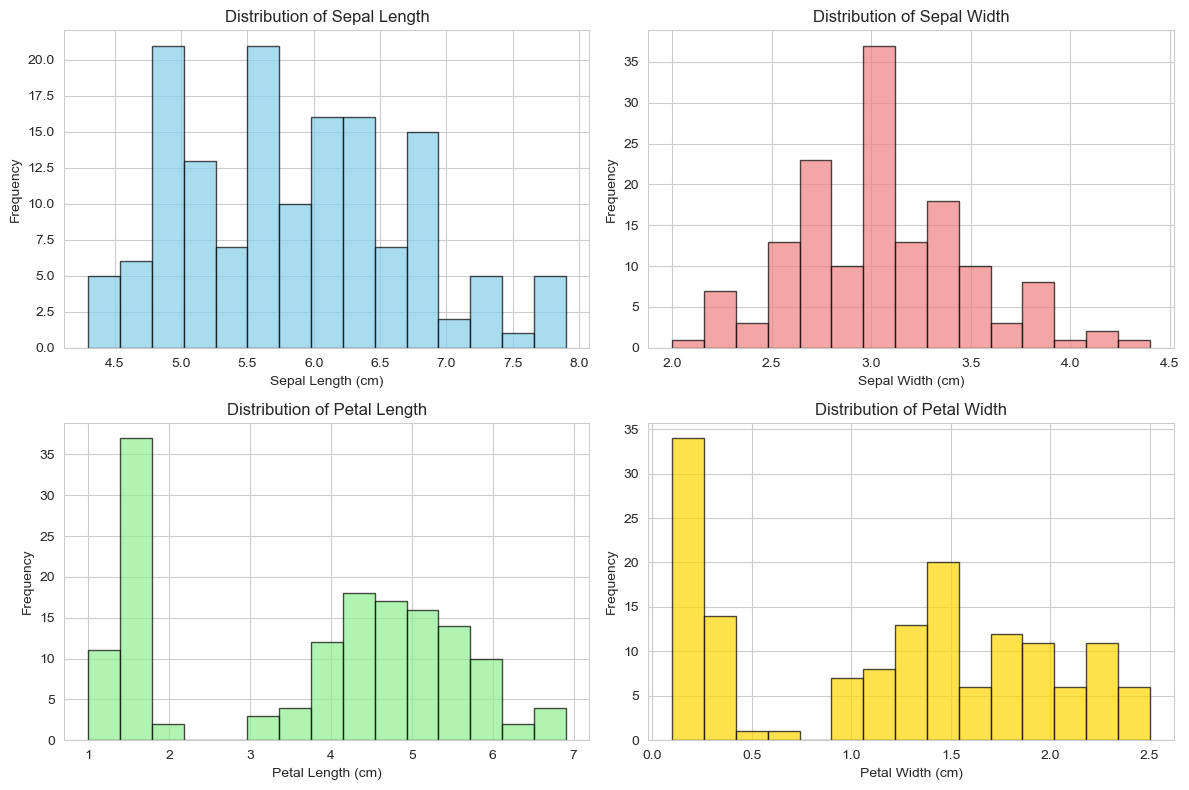

In [16]:
# Histograms for all numerical features
plt.figure(figsize=(12, 8))

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    plt.hist(iris[feature], bins=15, color=colors[i], alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(f'{feature.replace("_", " ").title()} (cm)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

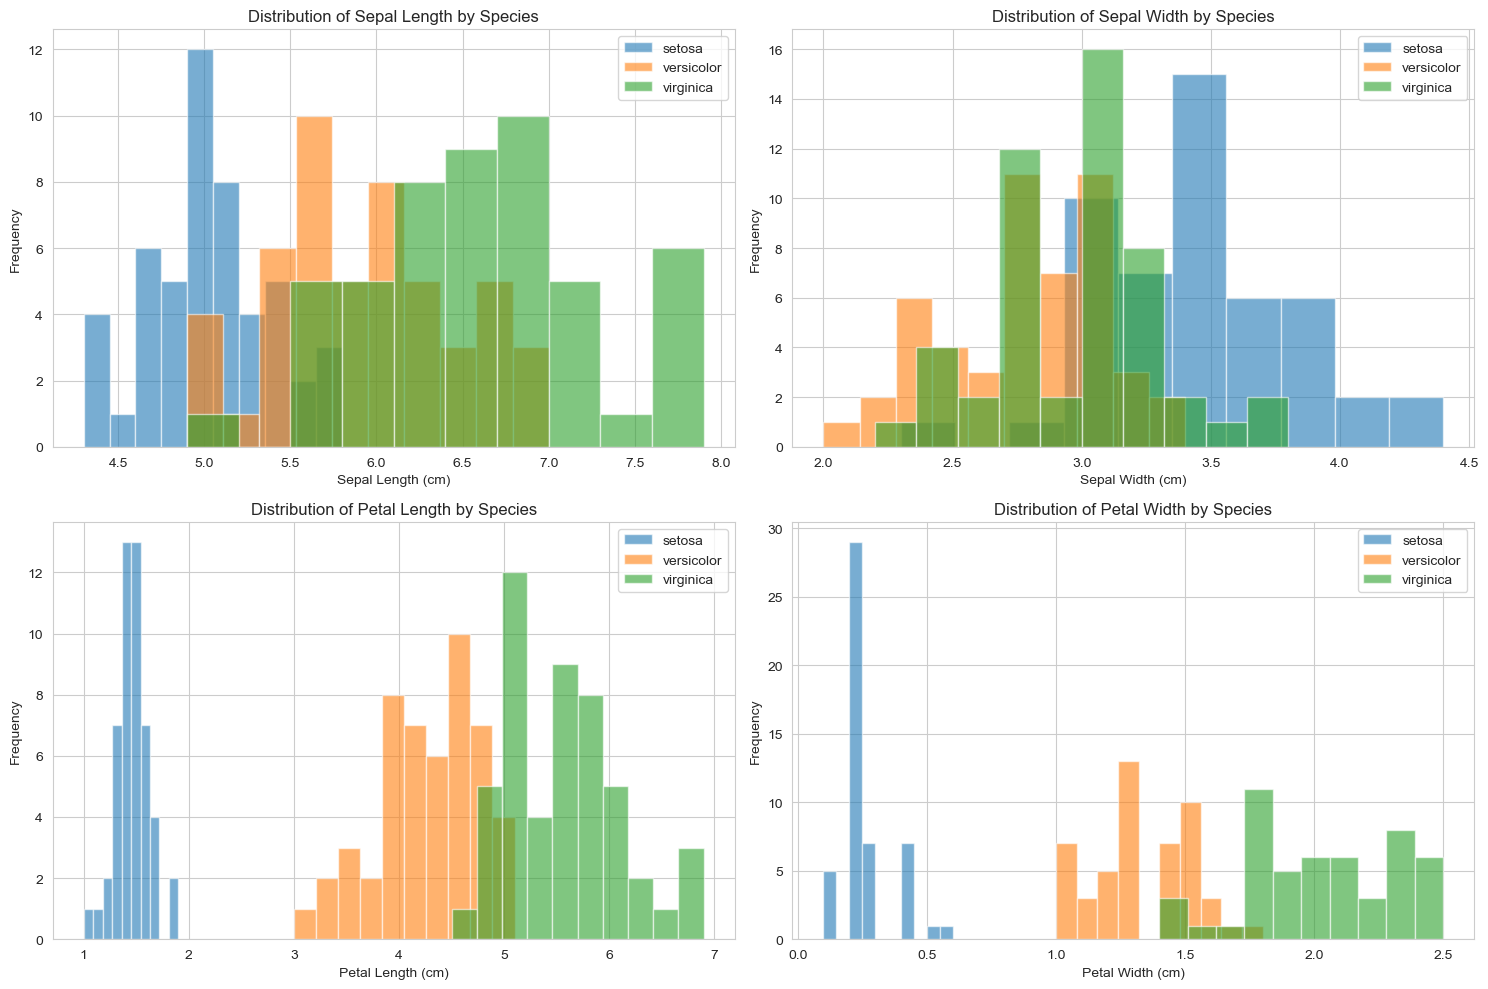

In [18]:
# Histograms grouped by species
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    for species in iris['species'].unique():
        species_data = iris[iris['species'] == species][feature]
        plt.hist(species_data, alpha=0.6, label=species, bins=10)
    
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Species')
    plt.xlabel(f'{feature.replace("_", " ").title()} (cm)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

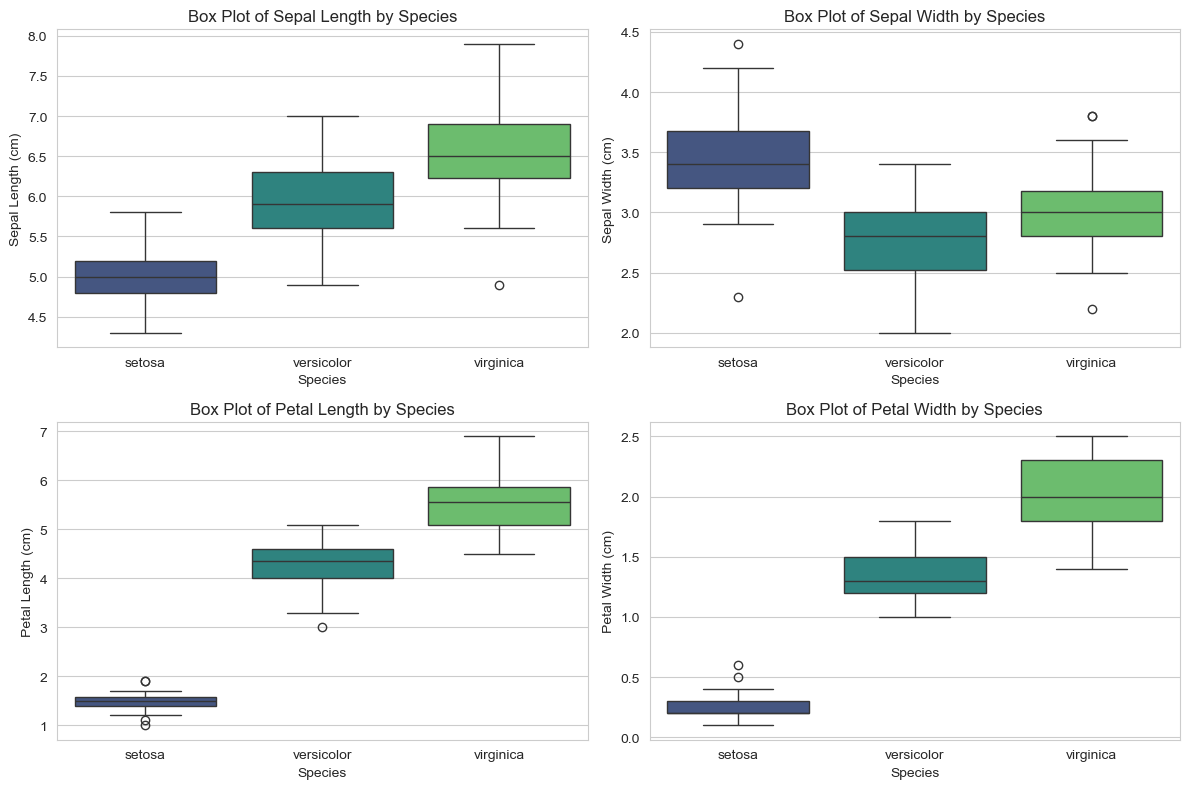

In [28]:
# Box plots for all features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris, x='species', y=feature, hue='species', palette='viridis', legend=False)
    plt.title(f'Box Plot of {feature.replace("_", " ").title()} by Species')
    plt.xlabel('Species')
    plt.ylabel(f'{feature.replace("_", " ").title()} (cm)')

plt.tight_layout()
plt.show()

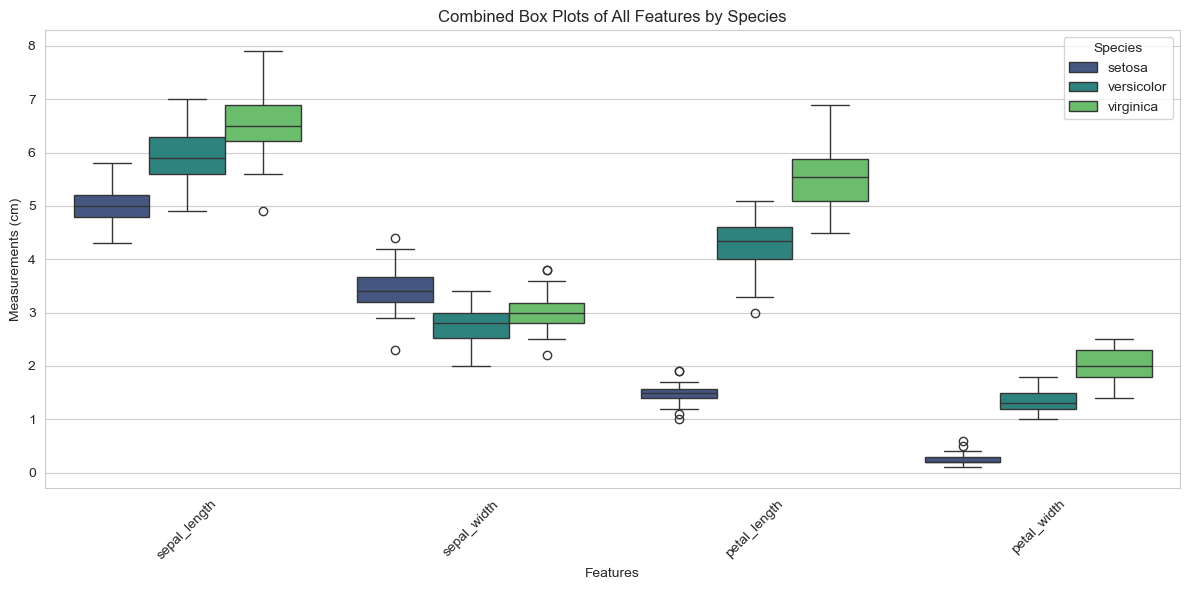

In [24]:
# Combined box plot for better comparison
plt.figure(figsize=(12, 6))

# Melt the dataframe for easier plotting with seaborn
iris_melted = iris.melt(id_vars=['species'], 
                        value_vars=features,
                        var_name='feature', 
                        value_name='value')

sns.boxplot(data=iris_melted, x='feature', y='value', hue='species', palette='viridis')
plt.title('Combined Box Plots of All Features by Species')
plt.xlabel('Features')
plt.ylabel('Measurements (cm)')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.tight_layout()
plt.show()

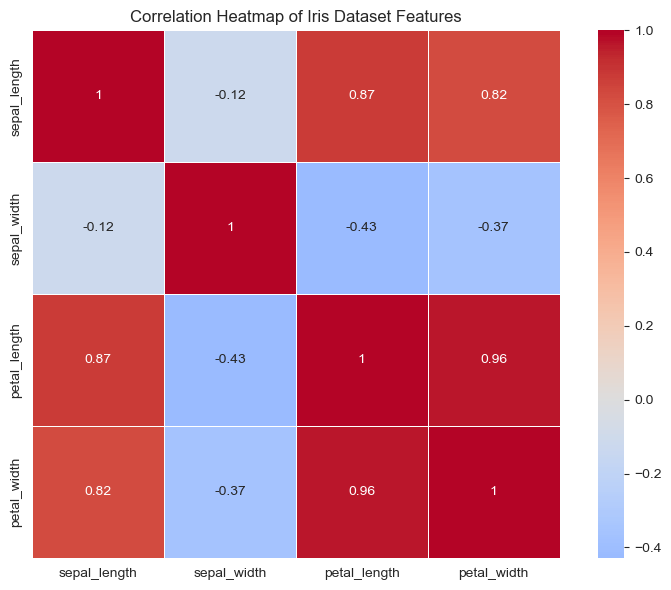


=== SUMMARY STATISTICS BY SPECIES ===

setosa:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4

In [26]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_data = iris.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.tight_layout()
plt.show()

# Summary statistics by species
print("\n=== SUMMARY STATISTICS BY SPECIES ===")
for species in iris['species'].unique():
    print(f"\n{species}:")
    species_data = iris[iris['species'] == species]
    print(species_data[features].describe())